In [86]:
import pandas as pd

df = pd.read_csv('./data/flats_dirty.csv')
df.head()

,url,Rynek,Cena,Powierzchnia,Cena za m2,Liczba pokoi,Piętro,Liczba pięter,Czynsz administracyjny,Typ mieszkania,...,Cena za garaż/Miejsce parkingowe,Komunikacja,Powierzchnia przedpokoju,Alarm,Liczba oddzielnych toalet,Stan mieszkania,Ciepła woda,Rodzaj ogrzewania,Typ okien,Powierzchnia kuchni
0,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,420 000 zł,26.8 m2,15 672 zł,1,1,7,350.0,Apartament,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,490 000 zł,36.98 m2,13 250 zł,2,4,4,389.0,Apartament,...,40 000 zł,Autobus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,900 000 zł,48.47 m2,18 568 zł,2,3,4,1064.0,Apartament,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,730 739 zł,31.91 m2,22 900 zł,2,3,5,NaN,Apartament,...,60 000 zł,NaN,2.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,1 270 000 zł,97.34 m2,13 047 zł,4,2,4,800.0,"Apartament ,Jednopoziomowe",...,120 000 zł,Autobus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df1 = pd.DataFrame()

df.columns

Index(['url', 'Rynek', 'Cena', 'Powierzchnia', 'Cena za m2', 'Liczba pokoi',
       'Piętro', 'Liczba pięter', 'Czynsz administracyjny', 'Typ mieszkania',
       'Rodzaj nieruchomości', 'Stan nieruchomości', 'Umeblowanie',
       'Dostępne od', 'Numer oferty', 'Zobacz spacer 360°', 'Rodzaj budynku',
       'Rok budowy', 'Winda', 'Monitoring', 'Ochrona', 'Recepcja',
       'Teren ogrodzony', 'Liczba łazienek', 'Adres', 'W pobliżu', 'opis',
       'Balkon', 'Materiał', 'Domofon', 'Wysokość pomieszczeń (cm)',
       'Powierzchnie pokoi', 'Podłogi w pomieszczeniach', 'Typ kuchni',
       'Garaż/Miejsca parkingowe',
       'Informacje o Garażu/Miejscach parkingowych',
       'Liczba miejsc parkingowych', 'Cena za garaż/Miejsce parkingowe',
       'Komunikacja', 'Powierzchnia przedpokoju', 'Alarm',
       'Liczba oddzielnych toalet', 'Stan mieszkania', 'Ciepła woda',
       'Rodzaj ogrzewania', 'Typ okien', 'Powierzchnia kuchni'],
      dtype='object')

## Data analysis

In [88]:
df1['url'] = df['url']
df1['Liczba pokoi'] = df['Liczba pokoi']
df1['Piętro'] = df['Piętro']
df1['Liczba pięter'] = df['Liczba pięter']
df1['Adres'] = df['Adres']
df1['opis'] = df['opis']

### Rynek

In [89]:
df1['Rynek'] = df['Rynek'].astype('category')
df1['Rynek'].value_counts()

Rynek
Wtórny       68
Pierwotny     1
Name: count, dtype: int64

### Cena całkowita

In [90]:
df1["Cena"] = df["Cena"].str.replace(" zł", "").str.replace(" ", "").astype(float)
df1["Cena"].describe()

count    6.900000e+01
mean     6.454374e+05
std      2.316900e+05
min      2.500000e+05
25%      4.700000e+05
50%      5.990000e+05
75%      7.990000e+05
max      1.270000e+06
Name: Cena, dtype: float64

### Powierzchnia

Text(0.5, 0, 'Powierzchnia [m2]')

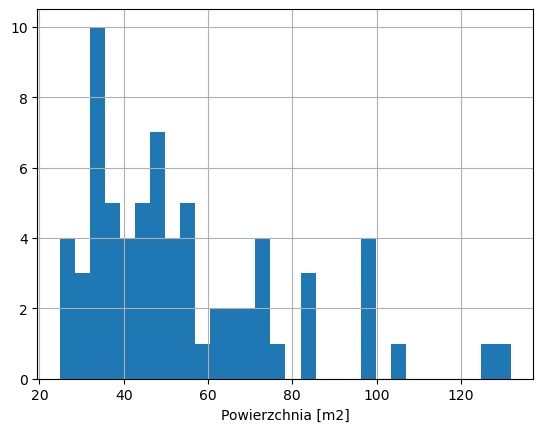

In [91]:
df1["Powierzchnia"] = df["Powierzchnia"].str.replace(" m2", "").str.replace(",", ".").astype(float)
df1["Powierzchnia"].hist(bins=30).set_xlabel("Powierzchnia [m2]")

### Cena za m2

Text(0.5, 0, 'Cena za metr [zł/m2]')

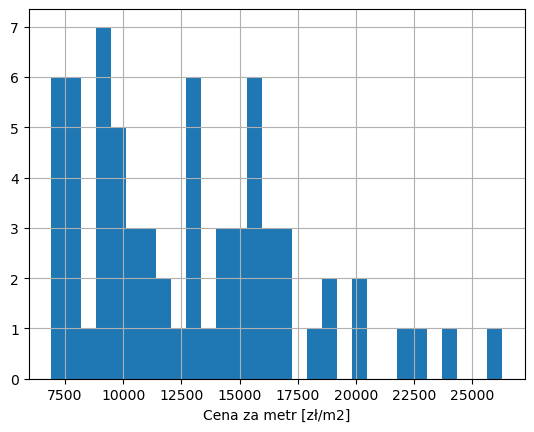

In [92]:
df1["Cena za m2"] = df["Cena za m2"].str.replace(" zł", "").str.replace(" ", "").astype(float)
df1["Cena za m2"].hist(bins=30).set_xlabel("Cena za metr [zł/m2]")

### Czynsz administracyjny

In [93]:
for (idx, row) in df[df["Czynsz administracyjny"].isna()][["Numer oferty", "opis"]].iterrows():
    numer_oferty = row.iloc[0]
    opis = row.iloc[1]
    x = row['opis'].find("czynsz")
    print(numer_oferty, opis[x-64:x+37])

24123/3685/OMS 
29044/3685/OMS 
29243/3685/OMS Apartament jest obsługiwany i wynajmowany przez hotel ze stałym czynszem najmu w wysokości 25480  zł.
31096/3685/OMS 
21279/3685/OMS Apartament jest obsługiwany i wynajmowany przez hotel ze stałym czynszem najmu w wysokości 39 tys. zł


In [94]:
df.loc[df["Numer oferty"]=="21279/3685/OMS", "Czynsz administracyjny"] = 39000 / 12
df.loc[df["Numer oferty"]=="29243/3685/OMS", "Czynsz administracyjny"] = 25480 / 12

Text(0.5, 0, 'Czynsz administracyjny [zł]')

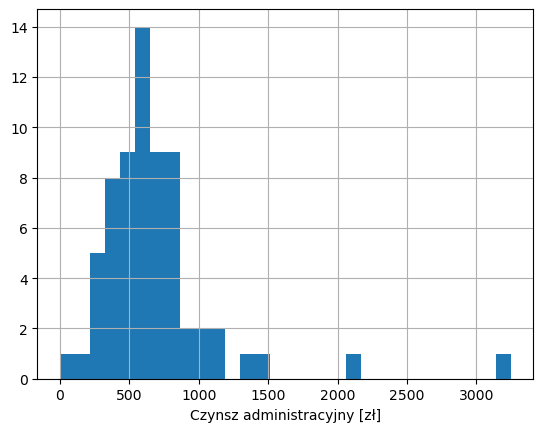

In [95]:
df1["Czynsz administracyjny"] = df["Czynsz administracyjny"].astype(float)
df1["Czynsz administracyjny"].hist(bins=30).set_xlabel("Czynsz administracyjny [zł]")

### Rodzaj nieruchomości

In [96]:
df["Rodzaj nieruchomości"].astype('category').unique()

['Mieszkanie']
Categories (1, object): ['Mieszkanie']

### Stan nieruchomości

In [97]:
df1["Stan nieruchomości"] = df["Stan nieruchomości"].astype('category')
df1["Stan nieruchomości"].cat.categories

Index(['Bardzo dobry', 'Do adaptacji', 'Do drobnego remontu',
       'Do kapitalnego remontu', 'Do odnowienia', 'Do odświeżenia',
       'Do remontu', 'Do wykończenia', 'Dobry', 'Idealny', 'Po remoncie',
       'Stan deweloperski'],
      dtype='object')

### Umeblowanie

In [98]:
df1["Umeblowanie"] = df["Umeblowanie"].astype('category')
df1["Umeblowanie"].cat.categories

Index(['Częściowo', 'Możliwe', 'Nie', 'Tak'], dtype='object')

### Dostępne od

Text(0.5, 0, 'Dostępne od')

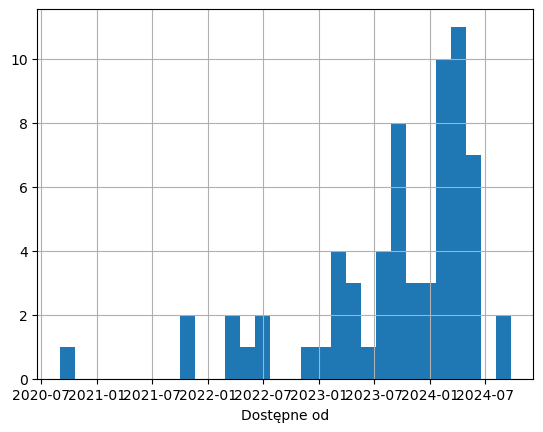

In [99]:
df1["Dostępne od"] = df["Dostępne od"].astype('datetime64[ns]')
df1["Dostępne od"].hist(bins=30).set_xlabel("Dostępne od")

### Numer oferty

In [100]:
df1["Numer oferty"] = df["Numer oferty"]
df1["Numer oferty"].isna().sum()

0

### Rodzaj budynku

In [101]:
df1["Rodzaj budynku"] = df["Rodzaj budynku"].astype('category')
df1["Rodzaj budynku"].cat.categories

Index(['Apartamentowo-handlowy', 'Biurowo-handlowy', 'Budynek apartamentowy',
       'Część domu', 'Dom', 'Hotel', 'Kamienica', 'Mieszkalno-biurowy',
       'Niski blok', 'Segment'],
      dtype='object')

### Rok budowy

Text(0.5, 0, 'Rok budowy')

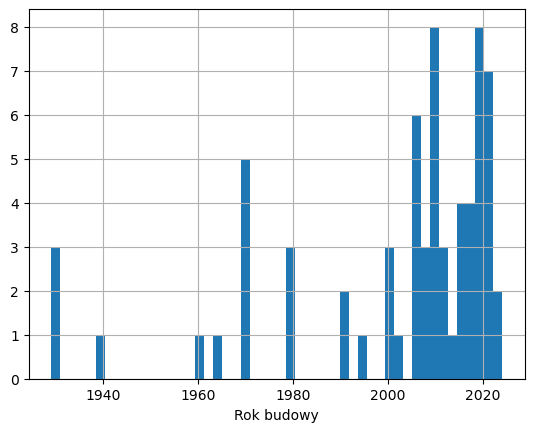

In [102]:
df1["Rok budowy"] = df["Rok budowy"].astype(float)
df1["Rok budowy"].hist(bins=50).set_xlabel("Rok budowy")

### Materiał

In [103]:
df1["Materiał"] = df["Materiał"].fillna("Inne").astype('category')
df1["Materiał"].value_counts()

Materiał
Ceramika        19
Cegła           17
Silikat         13
Mieszany         7
Inne             6
Wielka Płyta     3
Bloczki          2
Drewno           1
Pustak           1
Name: count, dtype: int64

### Winda

In [104]:
df1["Winda"] = df["Winda"].fillna("Nie").astype('category')
df1["Winda"].value_counts()

Winda
Tak    43
Nie    26
Name: count, dtype: int64

### Domofon

In [105]:
df1["Domofon"] = df["Domofon"].fillna("Nie").astype('category')
df1["Domofon"].value_counts()

Domofon
Tak    62
Nie     7
Name: count, dtype: int64

### Wysokość pomieszczeń (cm)

In [106]:
df1["Wysokość pomieszczeń (cm)"] = df["Wysokość pomieszczeń (cm)"].apply(lambda x: x if x > 200 else x * 100)
df1["Wysokość pomieszczeń (cm)"] = df1["Wysokość pomieszczeń (cm)"].fillna(260)
df1["Wysokość pomieszczeń (cm)"].value_counts()

Wysokość pomieszczeń (cm)
260.0    40
250.0    13
270.0     5
255.0     4
265.0     3
330.0     2
316.0     1
340.0     1
Name: count, dtype: int64

### Podłogi w pomieszczeniach

In [107]:
df1["Podłogi w pomieszczeniach"] = df["Podłogi w pomieszczeniach"].fillna('inne')

df1.loc[df1["Podłogi w pomieszczeniach"].str.contains("Panele"), "Podłoga_Panele"] = True
df1["Podłoga_Panele"] = df1["Podłoga_Panele"].fillna(False)

df1.loc[df1["Podłogi w pomieszczeniach"].str.contains("Terakota"), "Podłoga_Terakota"] = True
df1["Podłoga_Terakota"] = df1["Podłoga_Terakota"].fillna(False)

df1.loc[df1["Podłogi w pomieszczeniach"].str.contains("Wykładzina"), "Podłoga_Wykładzina"] = True
df1["Podłoga_Wykładzina"] = df1["Podłoga_Wykładzina"].fillna(False)

df1.loc[df1["Podłogi w pomieszczeniach"].str.contains("Płytki"), "Podłoga_Płytki"] = True
df1["Podłoga_Płytki"] = df1["Podłoga_Płytki"].fillna(False)

df1.loc[df1["Podłogi w pomieszczeniach"].str.contains("Deska podłogowa"), "Podłoga_Deska"] = True
df1["Podłoga_Deska"] = df1["Podłoga_Deska"].fillna(False)

df1.loc[df1["Podłogi w pomieszczeniach"].str.contains("Wylewka betonowa"), "Podłoga_Wylewka"] = True
df1["Podłoga_Wylewka"] = df1["Podłoga_Wylewka"].fillna(False)

df1.loc[(df1["Podłoga_Panele"] == False) & (df1["Podłoga_Terakota"] == False) & (df1["Podłoga_Wykładzina"] == False) & (df1["Podłoga_Płytki"] == False) & (df1["Podłoga_Deska"] == False) & (df1["Podłoga_Wylewka"] == False), "Podłoga_Inna"] = True
df1["Podłoga_Inna"] = df1["Podłoga_Inna"].fillna(False)

df1 = df1.drop(["Podłogi w pomieszczeniach"], axis=1)

/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_51951/997208011.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Podłoga_Panele"] = df1["Podłoga_Panele"].fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_51951/997208011.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Podłoga_Terakota"] = df1["Podłoga_Terakota"].fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_51951/997208011.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will cha

### Typ kuchni

In [108]:
df1["Typ kuchni"] = df["Typ kuchni"].fillna("Brak").astype('category')
df1["Typ kuchni"].value_counts()

Typ kuchni
Aneks        39
Widna        13
Oddzielna     7
Brak          5
Otwarta       4
Ciemna        1
Name: count, dtype: int64

### Liczba łazienek

In [109]:
df1["Liczba łazienek"] = df["Liczba łazienek"].fillna(0)
df1["Liczba łazienek"].value_counts()

Liczba łazienek
1.0    59
0.0     5
2.0     5
Name: count, dtype: int64

### Miejsce parkingowe

In [110]:
df["Informacje o Garażu/Miejscach parkingowych"].value_counts()

Informacje o Garażu/Miejscach parkingowych
Na ulicy                                                                                 18
Miejsce parkingowe                                                                       12
Garaż                                                                                     4
Parking strzeżony                                                                         2
Parking strzeżony, Na ulicy                                                               2
Na ulicy, Parking strzeżony                                                               2
Na ulicy, Parking strzeżony, Płatny dodatkowo                                             1
Parking niestrzeżony, Miejsce parkingowe                                                  1
Parking niestrzeżony                                                                      1
Płatny dodatkowo, Na ulicy                                                                1
Garaż, Jednostanowiskowy, Parking pod

In [111]:
df1["Parking_Na_Ulicy"] = df["Informacje o Garażu/Miejscach parkingowych"].str.contains("Na ulicy")

df1["Parking_Miejsce"] = df["Informacje o Garażu/Miejscach parkingowych"].str.contains("Miejsce parkingowe")

df1["Parking_Garaż"] = df["Informacje o Garażu/Miejscach parkingowych"].str.contains("Garaż")
df1["Parking_Garaż"] |= df["Informacje o Garażu/Miejscach parkingowych"].str.contains("Jednostanowiskowy")
df1["Parking_Garaż"] |= df["Informacje o Garażu/Miejscach parkingowych"].str.contains("podziemny")

df1["Parking_Inny"] = ~(df1["Parking_Na_Ulicy"] | df1["Parking_Miejsce"] | df1["Parking_Garaż"])

df1[["Parking_Na_Ulicy", "Parking_Miejsce", "Parking_Garaż", "Parking_Inny"]] = df1[["Parking_Na_Ulicy", "Parking_Miejsce", "Parking_Garaż", "Parking_Inny"]].fillna(False)
df1[["Parking_Na_Ulicy", "Parking_Miejsce", "Parking_Garaż", "Parking_Inny"]].value_counts()

/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_51951/3245654452.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[["Parking_Na_Ulicy", "Parking_Miejsce", "Parking_Garaż", "Parking_Inny"]] = df1[["Parking_Na_Ulicy", "Parking_Miejsce", "Parking_Garaż", "Parking_Inny"]].fillna(False)


Parking_Na_Ulicy  Parking_Miejsce  Parking_Garaż  Parking_Inny
True              False            False          False           25
False             False            False          True            19
                  True             False          False           14
                  False            True           False            8
                  True             True           False            1
True              False            True           False            1
                  True             False          False            1
Name: count, dtype: int64

### Komunikacja

In [112]:
df1["Komunikacja_Autobus"] = df["Komunikacja"].str.contains("Autobus").fillna(False)
df1["Komunikacja_Kolej"] = df["Komunikacja"].str.contains("Kolej").fillna(False)

df1["Komunikacja_PKS"] = df["Komunikacja"].str.contains("PKS").fillna(False)
df1["Komunikacja_PKS"] |= df["Komunikacja"].str.contains("Bus").fillna(False)

df1[["Komunikacja_Autobus","Komunikacja_Kolej","Komunikacja_PKS"]].value_counts()

/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_51951/3926830141.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Komunikacja_Autobus"] = df["Komunikacja"].str.contains("Autobus").fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_51951/3926830141.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Komunikacja_Kolej"] = df["Komunikacja"].str.contains("Kolej").fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_51951/3926830141.py:4: FutureWarning: Downcasting object dtype arrays on .filln

Komunikacja_Autobus  Komunikacja_Kolej  Komunikacja_PKS
True                 False              False              50
                     True               False               9
False                False              False               5
True                 True               True                3
False                False              True                1
True                 False              True                1
Name: count, dtype: int64

### W pobliżu

In [113]:
around = set()

for item in df["W pobliżu"].to_list():
    for x in item.split(", "):
        around.add(x)

for item in around:
    df1[f"W_pobliżu_{item}"] = df["W pobliżu"].str.contains(item).fillna(False)

df1[[f"W_pobliżu_{item}" for item in around]]

,W_pobliżu_Park,W_pobliżu_Komenda policji,W_pobliżu_Hala sportowa,W_pobliżu_Szpital,W_pobliżu_Bocznica kolejowa,W_pobliżu_Gimnazjum,W_pobliżu_Basen,W_pobliżu_Blacharnia,W_pobliżu_Szkoła,W_pobliżu_Rzeka,...,W_pobliżu_Las,W_pobliżu_Centrum handlowe,W_pobliżu_Przedszkole,W_pobliżu_Fitness,W_pobliżu_Bank,W_pobliżu_Kościół,W_pobliżu_Plac zabaw,W_pobliżu_Bar,W_pobliżu_Bazarek,W_pobliżu_Kort tenisowy
0,True,True,True,True,False,False,True,False,True,False,...,True,True,True,True,True,True,True,True,False,True
1,True,False,True,False,True,False,True,False,True,True,...,False,False,False,True,False,True,True,False,False,False
2,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,True,False,True
3,False,False,False,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,True,False,False,False,False,False,False,False,True,True,...,False,False,True,False,False,False,True,False,True,False
65,True,False,False,False,False,False,False,False,True,False,...,False,True,True,True,True,False,True,False,False,False
66,True,True,True,False,False,False,True,False,False,True,...,False,True,False,True,True,True,True,True,False,False
67,False,False,True,False,False,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False


### Typ mieszkania

In [114]:
flat_type = set()

for item in df["Typ mieszkania"].fillna("inne").astype(str).to_list():
    for x in item.split(","):
        x = "_".join(x.strip().split(" "))
        flat_type.add(x)  

for item in flat_type:
    df1[f"Typ_mieszkania_{item}"] = df["Typ mieszkania"].str.contains(item).fillna(False)

df1[[f"Typ_mieszkania_{item}" for item in flat_type]]

/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_51951/1885219543.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[f"Typ_mieszkania_{item}"] = df["Typ mieszkania"].str.contains(item).fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_51951/1885219543.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[f"Typ_mieszkania_{item}"] = df["Typ mieszkania"].str.contains(item).fillna(False)
/var/folders/_s/r6q44yzn7gd7hjnfjjlpb4hm0000gn/T/ipykernel_51951/1885219543.py:9: FutureWarning: Downcasting object dtype arrays on 

,Typ_mieszkania_Dwupoziomowe,Typ_mieszkania_Z_pokojem_przechodnim,Typ_mieszkania_Jednopoziomowe,Typ_mieszkania_Piętro_domu,Typ_mieszkania_Apartament,Typ_mieszkania_Rozkładowe,Typ_mieszkania_inne,Typ_mieszkania_Z_antresolą
0,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...
64,False,False,True,False,False,True,False,False
65,False,False,False,False,False,True,False,False
66,False,False,False,False,False,True,False,False
67,False,False,True,False,False,False,False,False


### Balkon

In [115]:
df1["Balkon"] = df["Balkon"].fillna("Nie").astype('category')
df1["Balkon"].value_counts()

Balkon
Tak    51
Nie    18
Name: count, dtype: int64

### Alarm

In [116]:
df1["Alarm"] = df["Alarm"].fillna("Nie").astype('category')
df1["Alarm"].value_counts()

Alarm
Nie    65
Tak     4
Name: count, dtype: int64

### Monitoring

In [117]:
df1["Monitoring"] = df["Monitoring"].fillna("Nie").astype('category')
df1["Monitoring"].value_counts()

Monitoring
Tak    43
Nie    26
Name: count, dtype: int64

### Ochrona

In [118]:
df1["Ochrona"] = df["Ochrona"].fillna("Nie").astype('category')
df1["Ochrona"].value_counts()

Ochrona
Nie    51
Tak    18
Name: count, dtype: int64

### Recepcja

In [119]:
df1["Recepcja"] = df["Recepcja"].fillna("Nie").astype('category')
df1["Recepcja"].value_counts()

Recepcja
Nie    53
Tak    16
Name: count, dtype: int64

### Teren ogrodzony

In [120]:
df1["Teren ogrodzony"] = df["Teren ogrodzony"].fillna("Nie").astype('category')
df1["Teren ogrodzony"].value_counts()

Teren ogrodzony
Nie    36
Tak    33
Name: count, dtype: int64

### Liczba oddzielnych toalet

In [121]:
df1["Liczba oddzielnych toalet"] = df["Liczba oddzielnych toalet"].fillna(0).astype('category')
df1["Liczba oddzielnych toalet"].value_counts()

Liczba oddzielnych toalet
0.0    63
1.0     6
Name: count, dtype: int64

## Podsumowanie

In [122]:
df1

,url,Liczba pokoi,Piętro,Liczba pięter,Adres,opis,Rynek,Cena,Powierzchnia,Cena za m2,...,Typ_mieszkania_Rozkładowe,Typ_mieszkania_inne,Typ_mieszkania_Z_antresolą,Balkon,Alarm,Monitoring,Ochrona,Recepcja,Teren ogrodzony,Liczba oddzielnych toalet
0,https://freedom.pl/oferta/mieszkanie-na-sprzed...,1,1,7,"Kołobrzeg, Zachodniopomorskie, ul. Tadeusza Ko...","NIŻSZA CENA!!! Apartament Diva, 200m od morza,...",Wtórny,420000.0,26.80,15672.0,...,False,False,False,Nie,Nie,Tak,Tak,Tak,Tak,0.0
1,https://freedom.pl/oferta/mieszkanie-na-sprzed...,2,4,4,"Kołobrzeg, Zachodniopomorskie, ul. Rybacka",Nieruchomość nad morzem\nPrezentujemy Państwu ...,Wtórny,490000.0,36.98,13250.0,...,False,False,False,Tak,Nie,Tak,Nie,Nie,Tak,0.0
2,https://freedom.pl/oferta/mieszkanie-na-sprzed...,2,3,4,"Kołobrzeg, Zachodniopomorskie, ul. Tadeusza Ko...","Apartament w hotelu Olimp I, od morza 200m\nNa...",Wtórny,900000.0,48.47,18568.0,...,False,False,False,Tak,Nie,Tak,Nie,Tak,Tak,0.0
3,https://freedom.pl/oferta/mieszkanie-na-sprzed...,2,3,5,"Kołobrzeg, Zachodniopomorskie,",Apartament 2 pokojowy w inwestycji Shellter\nA...,Wtórny,730739.0,31.91,22900.0,...,False,False,False,Tak,Nie,Tak,Tak,Tak,Tak,0.0
4,https://freedom.pl/oferta/mieszkanie-na-sprzed...,4,2,4,"Kołobrzeg, Zachodniopomorskie, ul. Aleksandra ...",4 pokojowe rozkładowe mieszkanie w Kołobrzegu\...,Wtórny,1270000.0,97.34,13047.0,...,False,False,False,Tak,Nie,Tak,Nie,Nie,Nie,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,https://freedom.pl/oferta/mieszkanie-na-sprzed...,3,3,4,"Kołobrzeg, Zachodniopomorskie, ul. Kaliska",3 pokojowe mieszkanie w Kołobrzegu\nTrzypokojo...,Wtórny,370000.0,45.30,8168.0,...,True,False,False,Tak,Nie,Tak,Nie,Nie,Nie,0.0
65,https://freedom.pl/oferta/mieszkanie-na-sprzed...,4,6,7,"Kołobrzeg, Zachodniopomorskie, ul. Kupiecka","Atrakcyjne 4-pokojowe, 2 balkony, gabinet, gar...",Wtórny,980000.0,103.38,9480.0,...,True,False,False,Tak,Nie,Nie,Nie,Nie,Nie,0.0
66,https://freedom.pl/oferta/mieszkanie-na-sprzed...,3,3,4,"Kołobrzeg, Zachodniopomorskie, ul. Stanisława ...","Stylowe 3 pokoje na Starówce. 3 balkony, garaż...",Wtórny,830000.0,67.70,12260.0,...,True,False,False,Tak,Nie,Tak,Nie,Nie,Tak,0.0
67,https://freedom.pl/oferta/mieszkanie-na-sprzed...,2,2,4,"Kołobrzeg, Zachodniopomorskie, ul. Trzebiatowska",Mieszkanie 2 pokojowe z balkonem w budynku z w...,Wtórny,550000.0,46.82,11747.0,...,False,False,False,Tak,Nie,Nie,Nie,Nie,Tak,0.0


In [123]:
# df1.to_csv('./data/flats_clean.csv', index=False)

In [124]:
df1.to_pickle('./data/flats_clean.pkl')